In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('datasets/obesity/obesity.csv')

In [2]:
# Mapping categorical variables to integers
mappings = {
    'Gender': {'Female': 0, 'Male': 1},
    'family_history_with_overweight': {'no': 0, 'yes': 1},
    'FAVC': {'no': 0, 'yes': 1},
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'SMOKE': {'no': 0, 'yes': 1},
    'SCC': {'no': 0, 'yes': 1},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'MTRANS': {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4},
    'NObeyesdad': {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2,
                   'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
}

for col, mapping in mappings.items():
    data[col] = data[col].map(mapping)

In [3]:
# Check the data after changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [3]:
# Separate the features and target variables
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Task: Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

# Cross-validation with 10 folds
scores = cross_val_score(rf_reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores (Negative Mean Squared Error):")
print(scores)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")

print("\n------------------------\n")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Feature importances
print("\nFeature Importances:")
print(rf_reg.feature_importances_)

Cross-Validation Scores (Negative Mean Squared Error):
[-9.47136792e-02 -1.06443602e-01 -3.29545024e-02 -1.97881517e-02
 -4.12587678e-02 -2.85407583e-02 -3.16616114e-02 -2.09777251e-02
 -2.04502370e-03 -4.73933649e-07]
Mean Negative MSE: -0.04
Standard Deviation: 0.03

------------------------

Mean Squared Error: 0.03
Root Mean Squared Error: 0.18
R-squared: 0.99

Feature Importances:
[4.32370284e-02 3.30066477e-03 5.81175933e-02 8.83441868e-01
 2.19066432e-04 1.22100849e-03 3.83057107e-03 1.21179723e-03
 1.03648888e-03 1.17788274e-04 1.51898563e-03 1.07940573e-04
 9.44687293e-04 6.88342107e-04 5.71724581e-04 4.34444638e-04]


In [4]:
# Select a few random indices from the test set to compare actual and predicted values
random_indices = random.sample(range(len(y_test)), 15)

for i in random_indices:
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    print(f"Actual Value: {actual_value:.2f}, Predicted Value: {predicted_value:.2f}")

Actual Value: 5.00, Predicted Value: 4.77
Actual Value: 0.00, Predicted Value: 0.00
Actual Value: 1.00, Predicted Value: 1.65
Actual Value: 2.00, Predicted Value: 2.02
Actual Value: 4.00, Predicted Value: 3.99
Actual Value: 4.00, Predicted Value: 4.95
Actual Value: 2.00, Predicted Value: 2.00
Actual Value: 3.00, Predicted Value: 3.00
Actual Value: 5.00, Predicted Value: 5.00
Actual Value: 2.00, Predicted Value: 1.10
Actual Value: 4.00, Predicted Value: 3.98
Actual Value: 0.00, Predicted Value: 0.00
Actual Value: 3.00, Predicted Value: 2.97
Actual Value: 1.00, Predicted Value: 0.63
Actual Value: 5.00, Predicted Value: 5.00


In [5]:
# Separate the features and target variables
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Task: Random Forest Regression (Pruned)
rf_reg_pruned = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=10, min_samples_split=10, max_features='sqrt')
rf_reg_pruned.fit(X_train, y_train)
y_pred_pruned = rf_reg_pruned.predict(X_test)

# Cross-validation with 10 folds
scores_pruned = cross_val_score(rf_reg_pruned, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores (Pruned, Negative Mean Squared Error):")
print(scores_pruned)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores_pruned):.2f}")
print(f"Standard Deviation: {np.std(scores_pruned):.2f}")

print("\n------------------------\n")

# Mean Squared Error
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
print(f"Mean Squared Error (Pruned): {mse_pruned:.2f}")

# Root Mean Squared Error
rmse_pruned = np.sqrt(mse_pruned)
print(f"Root Mean Squared Error (Pruned): {rmse_pruned:.2f}")

# R-squared (Coefficient of Determination)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f"R-squared (Pruned): {r2_pruned:.2f}")

Cross-Validation Scores (Pruned, Negative Mean Squared Error):
[-0.52578847 -0.38220115 -0.36871804 -0.24534898 -0.20602257 -0.17351403
 -0.36156358 -0.20343486 -0.0665203  -0.05803966]
Mean Negative MSE: -0.26
Standard Deviation: 0.14

------------------------

Mean Squared Error (Pruned): 0.17
Root Mean Squared Error (Pruned): 0.42
R-squared (Pruned): 0.96


In [6]:
# Select a few random indices from the test set to compare actual and predicted values
random_indices = random.sample(range(len(y_test)), 15)

for i in random_indices:
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    print(f"Actual Value: {actual_value:.2f}, Predicted Value: {predicted_value:.2f}")

Actual Value: 1.00, Predicted Value: 1.03
Actual Value: 3.00, Predicted Value: 2.95
Actual Value: 4.00, Predicted Value: 4.74
Actual Value: 4.00, Predicted Value: 4.00
Actual Value: 6.00, Predicted Value: 6.00
Actual Value: 5.00, Predicted Value: 5.00
Actual Value: 6.00, Predicted Value: 6.00
Actual Value: 5.00, Predicted Value: 5.01
Actual Value: 0.00, Predicted Value: 0.02
Actual Value: 5.00, Predicted Value: 5.00
Actual Value: 6.00, Predicted Value: 6.00
Actual Value: 4.00, Predicted Value: 3.99
Actual Value: 4.00, Predicted Value: 4.01
Actual Value: 3.00, Predicted Value: 3.29
Actual Value: 6.00, Predicted Value: 6.00


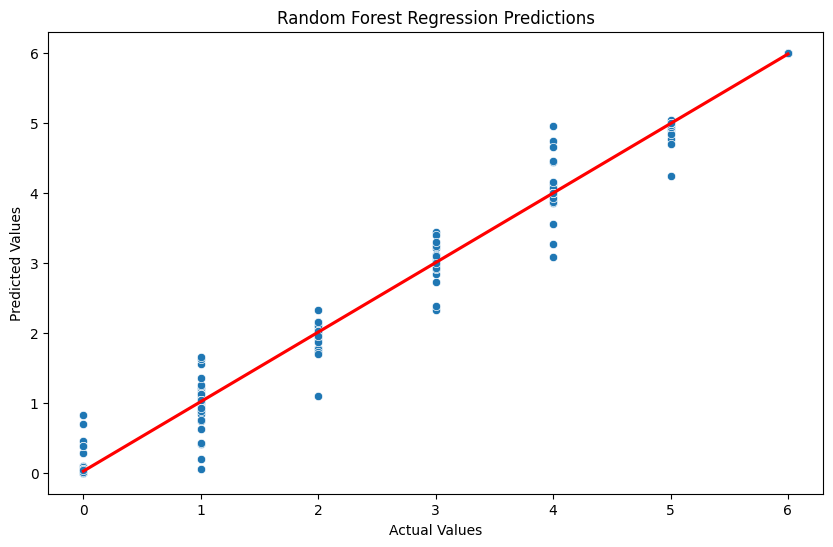

In [7]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, ci=None, scatter=False, color='red')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression Predictions')

# Show the plot
plt.show()

In [11]:
# Import required libraries
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Separate the features and target variables
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA and Random Forest Regression
pca = PCA(n_components=5)
rf_reg_pca = make_pipeline(pca, RandomForestRegressor(n_estimators=100, random_state=42))

# Fit the pipeline on the training data
rf_reg_pca.fit(X_train, y_train)

# Make predictions on the test data
y_pred_pca = rf_reg_pca.predict(X_test)

# Cross-validation with 10 folds
scores_pca = cross_val_score(rf_reg_pca, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores with PCA (Negative Mean Squared Error):")
print(scores_pca)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores_pca):.2f}")
print(f"Standard Deviation: {np.std(scores_pca):.2f}")

print("\n------------------------\n")

# Mean Squared Error
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error (with PCA): {mse_pca:.2f}")

# Root Mean Squared Error
rmse_pca = np.sqrt(mse_pca)
print(f"Root Mean Squared Error (with PCA): {rmse_pca:.2f}")

# R-squared (Coefficient of Determination)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R-squared (with PCA): {r2_pca:.2f}")

Cross-Validation Scores with PCA (Negative Mean Squared Error):
[-0.54087358 -0.41949242 -0.22967062 -0.11730521 -0.25135687 -0.37331659
 -0.2376763  -0.15828389 -0.04112607 -0.04659953]
Mean Negative MSE: -0.24
Standard Deviation: 0.15

------------------------

Mean Squared Error (with PCA): 0.19
Root Mean Squared Error (with PCA): 0.44
R-squared (with PCA): 0.95


In [14]:
# Separate the features and target variables
X = data.drop(['NObeyesdad', 'Gender', 'NCP', 'SMOKE'], axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Task: Random Forest Regression with dropped features
rf_reg_dropped = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_leaf=10, min_samples_split=10, max_features='sqrt')
rf_reg_dropped.fit(X_train, y_train)
y_pred_dropped = rf_reg_dropped.predict(X_test)

# Cross-validation with 10 folds
scores_dropped = cross_val_score(rf_reg_dropped, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores with Dropped Features (Negative Mean Squared Error):")
print(scores_dropped)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores_dropped):.2f}")
print(f"Standard Deviation: {np.std(scores_dropped):.2f}")

print("\n------------------------\n")

# Mean Squared Error
mse_dropped = mean_squared_error(y_test, y_pred_dropped)
print(f"Mean Squared Error (with Dropped Features): {mse_dropped:.2f}")

# Root Mean Squared Error
rmse_dropped = np.sqrt(mse_dropped)
print(f"Root Mean Squared Error (with Dropped Features): {rmse_dropped:.2f}")

# R-squared (Coefficient of Determination)
r2_dropped = r2_score(y_test, y_pred_dropped)
print(f"R-squared (with Dropped Features): {r2_dropped:.2f}")

Cross-Validation Scores with Dropped Features (Negative Mean Squared Error):
[-0.55524452 -0.42087638 -0.43523622 -0.35395309 -0.23863214 -0.18151598
 -0.40109346 -0.23373041 -0.07359751 -0.16737077]
Mean Negative MSE: -0.31
Standard Deviation: 0.14

------------------------

Mean Squared Error (with Dropped Features): 0.21
Root Mean Squared Error (with Dropped Features): 0.46
R-squared (with Dropped Features): 0.95
